# Kinetikaufgabe
Gegeben sind folgende Konzentrationen [A], gemessen nach Zeiten t in einer Lösung:

| [A], in mol/L | 5,00 x 10⁻² | 4,50 x 10⁻² | 4,00 x 10⁻² | 3,50 x 10⁻² | 3,00 x 10⁻² | 2,75 x 10⁻² |
|---------------|-------------|-------------|-------------|-------------|-------------|-------------|
| t, in s       | 240         | 270         | 300         | 345         | 400         | 450         |

Bestimmen Sie die Reaktionsordnung aus diesen Werten.

### Formeln für Reaktionsordnungen
$$\begin{align} 
&\text{0. Ordnung }[A] = [A]_0 -kt \\
&\text{1. Ordnung }\ln([A]) = \ln([A]_0) -kt \\
&\text{2. Ordnung }\frac{1}{[A]} = \frac{1}{[A]_0} +kt
\end{align}

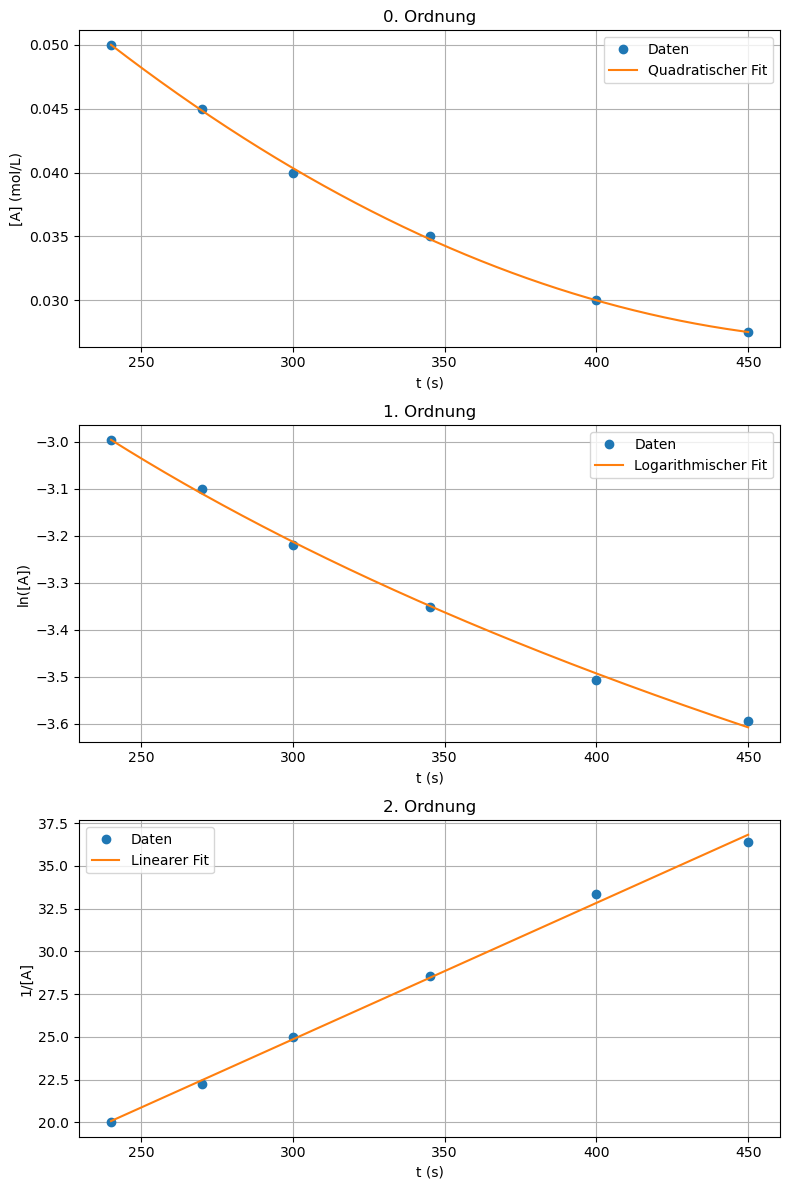

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = {
    "t (s)": [240, 270, 300, 345, 400, 450],
    "[A] (mol/L)": [5.00e-2, 4.50e-2, 4.00e-2, 3.50e-2, 3.00e-2, 2.75e-2],
}

df = pd.DataFrame(data)

# Zusätzliche Spalten berechnen
df["ln([A])"] = np.log(df["[A] (mol/L)"])
df["1/[A]"] = 1 / df["[A] (mol/L)"]

# Definition von Fit-Funktionen
def zero_order(t, a, b, c):
    return a * t**2 + b * t + c

def first_order(t, a, b):
    return a * np.log(t) + b

def second_order(t, k, A0):
    return 1 / A0 + k * t

# Anpassung der Daten an die Fits
popt_zero, _ = curve_fit(zero_order, df["t (s)"], df["[A] (mol/L)"])
popt_first, _ = curve_fit(first_order, df["t (s)"], df["ln([A])"])
popt_second, _ = curve_fit(second_order, df["t (s)"], df["1/[A]"])

# für kontinuierlicheren Datenpunkten
t_fine = np.linspace(df["t (s)"].min(), df["t (s)"].max(), 1000)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(df["t (s)"], df["[A] (mol/L)"], 'o', label="Daten")
axs[0].plot(t_fine, zero_order(t_fine, *popt_zero), '-', label="Quadratischer Fit")
axs[0].set_xlabel("t (s)")
axs[0].set_ylabel("[A] (mol/L)")
axs[0].set_title("0. Ordnung")
axs[0].grid()
axs[0].legend()

axs[1].plot(df["t (s)"], df["ln([A])"], 'o', label="Daten")
axs[1].plot(t_fine, first_order(t_fine, *popt_first), '-', label="Logarithmischer Fit")
axs[1].set_xlabel("t (s)")
axs[1].set_ylabel("ln([A])")
axs[1].set_title("1. Ordnung")
axs[1].grid()
axs[1].legend()

axs[2].plot(df["t (s)"], df["1/[A]"], 'o', label="Daten")
axs[2].plot(t_fine, second_order(t_fine, *popt_second), '-', label="Linearer Fit")
axs[2].set_xlabel("t (s)")
axs[2].set_ylabel("1/[A]")
axs[2].set_title("2. Ordnung")
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.savefig("plot_reaktionsordnung.pdf", format="pdf", bbox_inches="tight")
plt.show()